# Keyframe Labeling

Labels:

1 - Contains Title Sequence

2 - Contains Commercial

3 - Unknown

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from IPython.display import display, clear_output
from PIL import Image

import os
import sys
import glob
import warnings
import random

%load_ext autoreload
%autoreload 2

In [2]:
keyframes_path = '/scratch/users/hxm471/tmp/keyframes'
output_path = '/scratch/users/hxm471/tmp/dataset'

In [3]:
sys.path.insert(0,'/mnt/rds/redhen/gallina/home/hxm471/RedHenLab-Multimodal_TV_Show_Segmentation/mtvss/annotation')
from labeler import Labeler

In [4]:
def get_user_input():
    label = input("label:  ")
    return label

In [39]:
def map_index(path,idx,column):
    txt_path = path[:-3]+'txt'
    try:
        f = open(txt_path)
    except:
        return (None,None,None)
    content = f.readlines()
    split_content = content[idx//3].split(' ')
#     print('Split Content',split_content)
#     print('IDX',idx)
#     print('column',column)
    timestamp = str(int(float(split_content[7])))+'_'+\
                    str(int(float(split_content[-1].strip())))
    return (split_content[2+column],timestamp)

ValueError: too many values to unpack (expected 2)

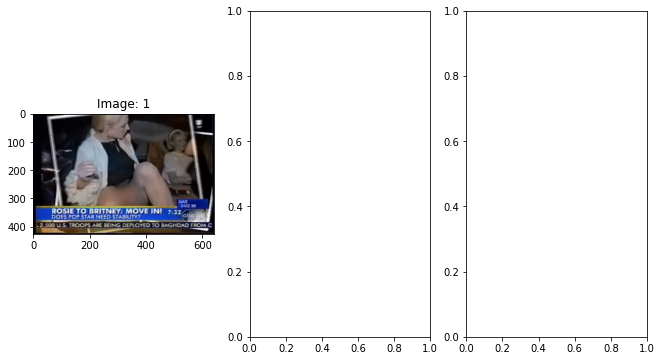

In [41]:
images = glob.glob(os.path.join(keyframes_path,'*.npy'))
random.shuffle(images)

for f in images:
    imgs = np.load(f)
    for _ in range(20):
        rand = random.randint(0,(imgs.shape[0]-1)//3)
        indx = rand*3
#         print("Index:",indx)
        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11,6))
        img_list = []
        
        
        
        
        for j, ax in enumerate(axs.flatten()):
            plt.sca(ax)
            plt.imshow(imgs[indx+j])
            #plt.colorbar()
            plt.title('Image: {}'.format(j+1))
            frame,timestamp = map_index(f,indx,j)
            img_list.append((Image.fromarray(imgs[indx+j]),frame,timestamp))

        plt.show()
        print(f'Now showing: {f}')
        
        label = get_user_input()
        if label!='':
            print(label)
            label_dir=''
            if(label=='1'):
                label_dir='title'
            elif(label=='2'):
                label_dir='commercial'
            else:
                if input("Press any key to continue or 'q' to quit")!='q':
                    clear_output()
                    continue
                else:
                    break
            for im,frame,timestamp in img_list:
                if(im==None):
                    continue
                final_des_path = os.path.join(output_path,
                                              label_dir,
                                              os.path.basename(f)[:-4]
                                              +'_'+str(frame)+'_'+str(timestamp))
                print('Saving File:',final_des_path)
                im.save(final_des_path,"JPEG")

        if input("Press any key to continue or 'q' to quit")!='q':
            clear_output()
            continue
        else:
            break
        clear_output()
